# Preprocessing

In [54]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import date, time

In [55]:
# Change filename as appropriate
filename = "Metazygia monitor 1.txt"
df = pd.read_csv(filename, index_col = 0, header = None, delimiter="\t")
display(df)

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
0,,,,,,,,,,,,,,,,,,,,,
145,20 Apr 17,16:46:00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
146,20 Apr 17,16:47:00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
147,20 Apr 17,16:48:00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
148,20 Apr 17,16:49:00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
149,20 Apr 17,16:50:00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21185,5 May 17,07:26:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21186,5 May 17,07:27:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21187,5 May 17,07:28:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating Labels

In [56]:
# This function creates the column labels into a list 

def create_column_labels(date_time_label, light_label, spider_count):
    # Create column labels
    column_names = []
    column_names.append(date_time_label)
    column_names.append(light_label)
    
    # Create spider labels 
    for x in range(1, spider_count + 1):
        column_names.append('Spider ' + str(x))
        
    return column_names

# Processing File

In [57]:
# This function creates a new .csv file with columns labeled Light and Spider name and Date-Time as
# the index

def txt_cleaning_to_csv(df):
    # Change spider count, your light column index number, and date-time label as you see fit
    number_of_spiders = 32
    light_column = 9
    date_time_label = 'Date-Time'
    column_names = create_column_labels(date_time_label, 'Light', number_of_spiders)

    # Keep the last number of spiders columns, the light column, and the first 2 columns, the rest will be removed
    last_df = df.iloc[:, -number_of_spiders:]
    first_df = df.iloc[:, :2]
    light_df = df.iloc[:, light_column - 1]
    date_time_df = first_df[1].astype(str) + ' ' + first_df[2].astype(str)

    # Concatenate the first and last sections of the dataframe
    newdf = pd.concat([first_df, light_df, last_df], axis = 1)
    newdf.insert(2, date_time_label, date_time_df)
    newdf = newdf.drop([1, 2], axis = 1)

    # Save dataframe as .csv file and set Date and Time columns into datetime format
    newdf.to_csv("Metazygia Monitor 1.csv", header = column_names, index = False)
    newdf = pd.read_csv("Metazygia Monitor 1.csv", parse_dates = [date_time_label])
    newdf.set_index(date_time_label, inplace = True)
    newdf.index = pd.to_datetime(newdf.index)
    
    return newdf

df = txt_cleaning_to_csv(df)
display(df)

,Light,Spider 1,Spider 2,Spider 3,Spider 4,Spider 5,Spider 6,Spider 7,Spider 8,Spider 9,...,Spider 23,Spider 24,Spider 25,Spider 26,Spider 27,Spider 28,Spider 29,Spider 30,Spider 31,Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-20 16:46:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-20 16:47:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-20 16:48:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-20 16:49:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-20 16:50:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-05 07:26:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-05-05 07:27:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-05-05 07:28:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Convert Cell Type Function

In [51]:
# Changes all count cell values to float

def convert_cell_type_to_float(df):
    for col in df.loc[:, df.columns.str.startswith('S')]:
        df[col] = df[col].astype(float)
        
    return df

df = convert_cell_type_to_float(df)
display(df)

,Light,Spider 1,Spider 2,Spider 3,Spider 4,Spider 5,Spider 6,Spider 7,Spider 8,Spider 9,...,Spider 23,Spider 24,Spider 25,Spider 26,Spider 27,Spider 28,Spider 29,Spider 30,Spider 31,Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-20 16:46:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:47:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:48:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:49:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:50:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-05 07:26:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-05 07:27:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-05 07:28:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Remove Spider Function

In [30]:
# Add list of spider names, as seen in columns, of spiders you wish to remove

spider_list = ['Spider 1']

# This function removes desired Spider column and all of the data associated with it

def remove_nth_spider(df, spider_list):
    new_df = df.drop(spider_list, axis = 1)
    
    return new_df

new_df = remove_nth_spider(df, spider_list)
display(new_df)

,Light,Spider 2,Spider 3,Spider 4,Spider 5,Spider 6,Spider 7,Spider 8,Spider 9,Spider 10,...,Spider 23,Spider 24,Spider 25,Spider 26,Spider 27,Spider 28,Spider 29,Spider 30,Spider 31,Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-20 16:46:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:47:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:48:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:49:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:50:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-05 07:26:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-05 07:27:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-05 07:28:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filter Spider Movement Data Function

In [31]:
# Keep desired data from date-time range and replace data outside range with NaN for a specified column

def keep_specific_spider_values(df, column_name, death_date_time_start, death_date_time_end):
    ts = df[[column_name]]
    ts.loc[death_date_time_start : death_date_time_end] = np.nan
    df['Spider 1'] = ts['Spider 1']
    
    return df

df = keep_specific_spider_values(df, 'Spider 1', '2017-04-20 16:49:00', '2017-05-05 07:30:00')
display(df[['Spider 1']])

/Users/alexispark/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/alexispark/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Spider 1
Date-Time,
2017-04-20 16:46:00,0.0
2017-04-20 16:47:00,0.0
2017-04-20 16:48:00,0.0
2017-04-20 16:49:00,NaN
2017-04-20 16:50:00,NaN
...,...
2017-05-05 07:26:00,NaN
2017-05-05 07:27:00,NaN
2017-05-05 07:28:00,NaN


# Split csv to LD and DD

In [52]:
def splitDF(df):
    df_split = df.copy()
    lights_turn_off = df[df['Light'].diff() == -1].index[-1]
    lights_turn_on = df[df['Light'].diff() == 1].index[-1]
    LD = df_split[df_split.index < lights_turn_off]
    LD.to_csv(filename + ' LD.csv')
    DD = df_split[df_split.index >= lights_turn_off]
    DD.to_csv(filename + ' DD.csv')
    display(LD, DD)
    
    return LD, DD

splitDF(df)

,Light,Spider 1,Spider 2,Spider 3,Spider 4,Spider 5,Spider 6,Spider 7,Spider 8,Spider 9,...,Spider 23,Spider 24,Spider 25,Spider 26,Spider 27,Spider 28,Spider 29,Spider 30,Spider 31,Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-20 16:46:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:47:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:48:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:49:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20 16:50:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-25 18:57:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-25 18:58:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-25 18:59:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Light,Spider 1,Spider 2,Spider 3,Spider 4,Spider 5,Spider 6,Spider 7,Spider 8,Spider 9,...,Spider 23,Spider 24,Spider 25,Spider 26,Spider 27,Spider 28,Spider 29,Spider 30,Spider 31,Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-25 19:02:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-25 19:03:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-25 19:04:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-25 19:05:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-25 19:06:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-05 07:26:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-05 07:27:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-05 07:28:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(                     Light  Spider 1  Spider 2  Spider 3  Spider 4  Spider 5  \
 Date-Time                                                                      
 2017-04-20 16:46:00      1       0.0       0.0       0.0       0.0       0.0   
 2017-04-20 16:47:00      1       0.0       0.0       0.0       0.0       0.0   
 2017-04-20 16:48:00      1       0.0       0.0       0.0       0.0       0.0   
 2017-04-20 16:49:00      1       0.0       0.0       0.0       0.0       0.0   
 2017-04-20 16:50:00      1       0.0       0.0       0.0       0.0       0.0   
 ...                    ...       ...       ...       ...       ...       ...   
 2017-04-25 18:57:00      1       0.0       0.0       0.0       0.0       0.0   
 2017-04-25 18:58:00      1       0.0       0.0       0.0       0.0       0.0   
 2017-04-25 18:59:00      1       0.0       0.0       0.0       0.0       0.0   
 2017-04-25 19:00:00      1       0.0       0.0       0.0       0.0       0.0   
 2017-04-25 19:01:00      1 

# Create Smaller Dataset

In [58]:
def csv_for_one_day_one_spider(df, column_name, date_time_start, date_time_end):
    ts = df[[column_name]]
    ts.loc[date_time_start : date_time_end]
    df['Spider 1'] = ts['Spider 1']
    
    return df

df = keep_specific_spider_values(df, 'Spider 1', '2017-04-20 16:49:00', '2017-04-21 16:49:00')
display(df[['Spider 1']])

# Don't know why the random NaNs are there, will fix

/Users/alexispark/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Spider 1
Date-Time,
2017-04-20 16:46:00,0.0
2017-04-20 16:47:00,0.0
2017-04-20 16:48:00,0.0
2017-04-20 16:49:00,NaN
2017-04-20 16:50:00,NaN
...,...
2017-05-05 07:26:00,0.0
2017-05-05 07:27:00,0.0
2017-05-05 07:28:00,0.0


In [59]:
def create_on_off_sublist(on_off_list):
    on_off_subList = [on_off_list[n:n+2] for n in range(0, len(on_off_list), 2)]
    return on_off_subList
    #create list of all dates and times where lights turn on and off
    transition_indexes_list = find_lights_turn_on_off(df)
    #create sublists containing each day of light switch indeces so they are easy to work with
    on_off_sublist = create_on_off_sublist(transition_indexes_list)
    return on_off_subList

#This function creates a list of dataframes for each date so that each date may be plotted individually
def create_list_of_df(LD):
    #find all unique days
    all_days = np.unique(list(LD.index.date))
    #create empty list to append to 
    bracket = []
    #loop through dataframe and create new df for every day
    for x in range(len(all_days)):
        bracket.append(LD[LD.index.date==all_days[x]])     
    return bracket

#This function finds all times when lights turn on and off and returns the index of these occurrences
#We need a new function doing this for the raster plot because the raster plot requires the first time the lights turn on
def find_lights_turn_on_off_for_raster_plot(LD):
    #find indices where lights turn on and off
    lights_turn_on_off = LD[LD['Light'].diff() != 0]
    lights_turn_on_off = lights_turn_on_off.append(LD.iloc[-1])
    #drop the first and last row because these are the beginning and end of the days
    on_off = lights_turn_on_off.iloc[1:-1, :]
    #turn the index into a list to loop through
    on_off_list = list(on_off.index.values)
    return on_off_list

#This function sets up the raster plot with subplots, adjusts the axes, and sets datetime for the x axis
def set_up_raster_plot(LD, column_name):
    #create list of dataframes each containing a unique date which will be used to plot the data on the graph
    list_of_df = create_list_of_df(LD)
    #find all unique days to make the y labels of the graph
    all_days = np.unique(list(LD.index.date))
    #set up fig and axis with the number of subplots being the number of unique days, set figsize
    fig, axs = plt.subplots(nrows = len(list_of_df), sharey = True, figsize = (10, 13))
    #adjust space between subplots
    plt.subplots_adjust(hspace = 0)
    #set labels for the x and y axis on the graph, as well as title
    axs[-1].set_xlabel('Time of Day')
    axs[0].title.set_text('Activity for ' + str(column_name) + ' Throughout Each Day')
    #adjust ticks
    for x in range(len(axs)-1):
        axs[x].set_yticks([])
        axs[x].set_xticks([])
    #set up the x axis to have time of day 
    hour_locator = matdates.HourLocator(byhour = range(24), interval = 2)
    axs[-1].xaxis.set_major_locator(hour_locator)
    axs[-1].xaxis.set_major_formatter(matdates.DateFormatter('%H:%M'))
    return fig, axs, list_of_df, all_days

#This function plots the activity data on the raster plot, highlights the times where lights were off, and plots a line for activity onset
def plot_data_on_raster_plot(LD, column_name, light_switch_times):
    #use function that set up raster plot to define fig and axs variables
    fig, axs, list_of_df, all_days = set_up_raster_plot(LD, column_name)
    #set up for loop that plots each day on each subplot
    for i in range(len(axs)):
        #plot each day
        axs[i].plot_date((list_of_df[i].index.values), list_of_df[i][column_name], color = 'black', linestyle = 'solid',
                        marker = 'None')
        #Make y labels the date
        axs[i].set_ylabel(all_days[i])
        #Set the margins
        axs[i].margins(x = 0.001)
        #add shading for when it is dark for each subplot
        #axs[i].axvspan(list_of_df[i].index[0], light_switch_times[i][0], alpha = 0.5, color = 'grey')
        #axs[i].axvspan(light_switch_times[i][1], list_of_df[i].index[-1], alpha = 0.5, color = 'grey')


    #save the figure as a png file
    #plt.savefig(filename + ' ' + column_name + ' Raster Plot.png')

NameError: name 'matdates' is not defined

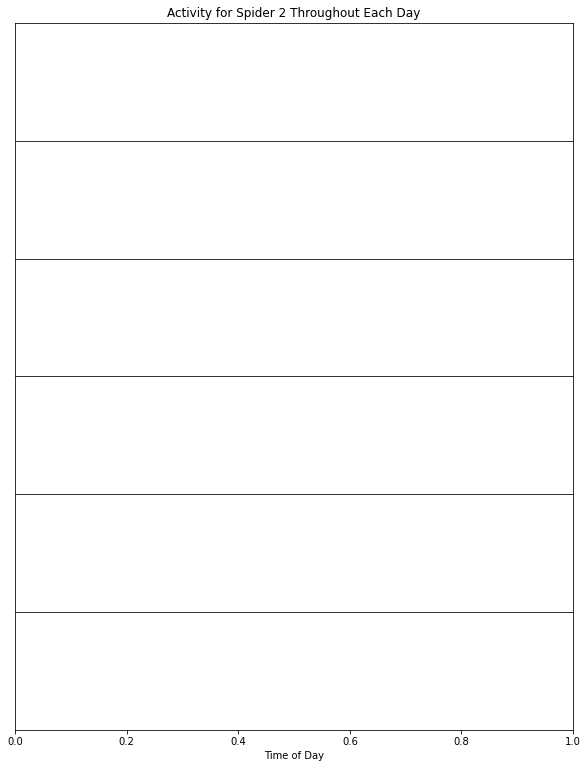

In [60]:
#Create list of times that lights turn on and off so that the raster plot is shaded
light_switch_times_list = find_lights_turn_on_off_for_raster_plot(df)
#Combine list elements with the same date into one element so that they can be looped through
light_switch_times = create_on_off_sublist(light_switch_times_list)
#Create list of spider names to loop through to create raster plots
column_names = LD.loc[:, LD.columns != 'Light']
#loop through spiders and create raster plots
for x in column_names:
    plot_data_on_raster_plot(LD, x, light_switch_times)
    
warnings.filterwarnings("ignore")